# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

### Problem Statement

E-news Express, an online news portal, wants to grow its business through the acquisition of new subscribers. The executive leadership team at E-news is concerned about a decline in new subscribers compared to last year and think that the current webpage design is to blame.

A new landing page has been created and E-news would like to test its effectiveness at driving user engagement and its impact on converting users to new subscribers.

### Objectives

A random sample of 100 users has been selected. This sample will be evenly split into two groups. The first group, the control group, will be served the existing landing page; the second group, the treatment group, will be served the new landing page.

Through this A/B testing, E-news would like to determine the following:
- Are users spending more time on the new landing page or the old landing page?
- Is the conversion rate for the new landing page higher than that of the old landing page?
- Does user conversion depend on the user's preferred language?
- Does user's preferred language make a difference in time spent on the new landing page?

All statistical analysis will be preformed using a significance level of 5%.

### Data Dictionary

1. user_id - Unique user ID of the person visiting the website
2. group - Whether the user belongs to the first group (control) or the second group (treatment)
3. landing_page - Whether the landing page is new or old
4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
5. converted - Whether the user gets converted to a subscriber of the news portal or not
6. language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries, define alpha, and define p-value compare function

In [1]:
#importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#setting alpha value
alpha = 0.05

#define function to compare p-value and alpha
def pval_comp(x):
    '''
    x = p-value to pass in
    '''
    if x < alpha:
        print(f'Since the p-value {x} is less than {alpha}, we reject the null hypothesis.')
    elif x == alpha:
        print(f'Since the p-value {x} is equal to {alpha}, we reject the null hypothesis.')
    else:
        print(f'Since the p-value {x} is greater than {alpha}, we fail to reject the null hypothesis.')

## Reading the Data into a DataFrame

In [2]:
#reading in data
enews = pd.read_csv('abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [3]:
#viewing first 5 records
enews.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
#viewing last 5 records
enews.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [5]:
#checking shape of dataframe
print(f'The dataset is made up of {enews.shape[0]} rows and {enews.shape[1]} columns.')

The dataset is made up of 100 rows and 6 columns.


In [6]:
#checking data types
enews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [7]:
#checking for missing values in the data
print('Number of missing values in the data:',enews.isnull().sum().sum())

Number of missing values in the data: 0


In [8]:
#checking statistical summary
enews.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#checking for duplicate values
print('Number of duplicate rows in the data:',enews.duplicated().sum())

Number of duplicate rows in the data: 0


In [10]:
#checking unique values
enews.nunique().to_frame()

,0
user_id,100
group,2
landing_page,2
time_spent_on_the_page,94
converted,2
language_preferred,3


#### Observations

- The dataset has 100 rows and 6 columns.
- There are 2 numerical variables.
    - user_id: int64 - this value is unique to each row
    - time_spent_on_the_page: float64
- There are 4 categorical (object) variables.
    - group - there are two distinct values: control, treatment
    - landing_page - there are two distinct values: old, new
    - converted - there are two distinct values: yes, no
    - language_preferred - there are three distinct values: English, Spanish, French
- There are no missing values and no duplicate rows in the data.

### Univariate Analysis

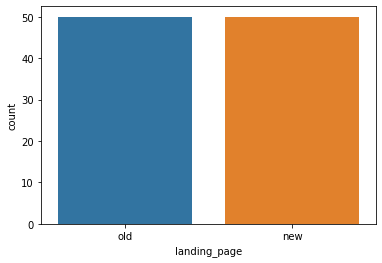

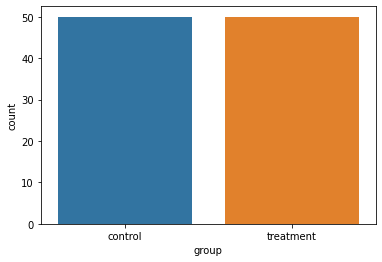

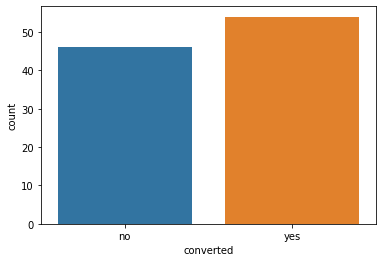

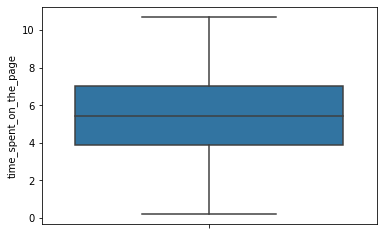

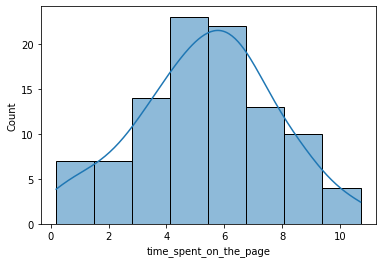

,Spanish,French,English
language_preferred,34,34,32


In [11]:
#countplots to show count of landing page and group
sns.countplot(data=enews, x='landing_page')
plt.show()
sns.countplot(data=enews, x='group')
plt.show()

#countplot to show conversions
sns.countplot(data=enews, x='converted')
plt.show()

#boxplot and histplot to visualize distribution of time spent on landing page
sns.boxplot(data=enews, y='time_spent_on_the_page')
plt.show()
sns.histplot(data=enews, x='time_spent_on_the_page', kde=True)
plt.show()

#count by language
enews['language_preferred'].value_counts().to_frame().T

#### Observations

- The landing page and group graphs are identical. This is what we would expect since the values are dependent on each other and essentially refer to the same thing (i.e. control group was served the old landing page, while treatment group was served the new landing page).
- The conversion rate does not really mean much until we break it out and look at it by group. No meaningful insight can really be drawn while looking at it in totality.
- The amount of time spent on the landing page is normally distributed. It will be interesting to see if this carries over when looking at it by group.
- The count of users by language is almost equally split between English, Spanish, and French, with the latter two being only slightly higher than English.

### Bivariate Analysis

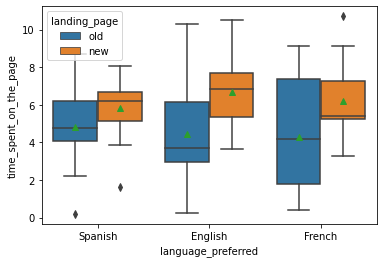

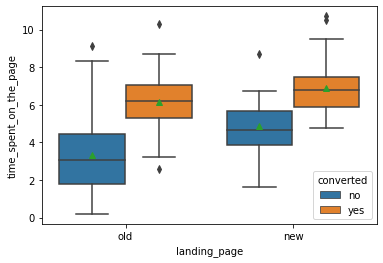

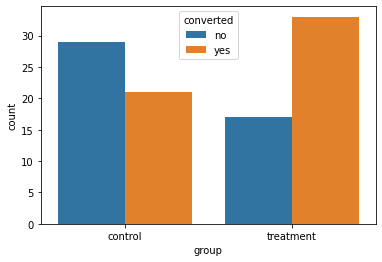

In [12]:
#boxplots to compare language vs time spent on new page & old page by landing page
sns.boxplot(data=enews,x='language_preferred',y='time_spent_on_the_page',hue='landing_page',showmeans=True)
plt.show()

#boxplots to compare time spent vs new landing page & old landing page by conversion
sns.boxplot(data=enews,x='landing_page',y='time_spent_on_the_page',hue='converted',showmeans=True)
plt.show()

#countplot to compare group vs conversion
sns.countplot(data=enews,x='group',hue='converted')
plt.show()

#### Observations

- Preferred language does not seem to have an impact on how much time the user spends on the landing page - the means are all similar.
    - The means for time spent on the old page is lower than the means for time spent on the new page.
- Users seem to be spending more time, on average, on the new landing page than the old landing page.
    - This is true for both converted and non-converted users.
    - The mean for conversion rate is higher on the new landing page than the old landing page.
- Converted users spend more time on the landing page than non-converted users.
- Conversion rate is higher in the treatment group (users who receive new landing page).

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

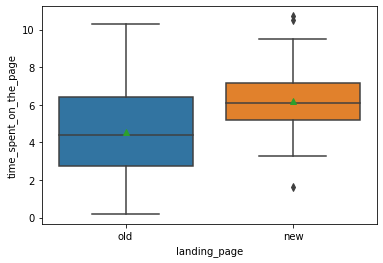

In [13]:
#boxplot for time spent vs landing page
sns.boxplot(data=enews,x='landing_page',y='time_spent_on_the_page',showmeans=True)
plt.show()

### Step 1: Define the null and alternate hypotheses

Let $\mu_1$ be the mean time spent on the new landing page.
<br>
Let $\mu_2$ be the mean time spent on the old landing page.

$H_0:\mu_1=\mu_2$

$H_a:\mu_1>\mu_2$

### Step 2: Select Appropriate test

We will use a two sample indepedent t-test since the populations are independent and standard deviations are unknown.

### Step 3: Decide the significance level

Based on the problem statement, we can assume $\alpha = 0.05$

### Step 4: Collect and prepare data

In [14]:
#new variables for time spent on the old & new landing page
new_enews = enews[enews['landing_page']=='new']['time_spent_on_the_page']
old_enews = enews[enews['landing_page']=='old']['time_spent_on_the_page']

#printing sample means and std deviations
print('old page sample mean:',old_enews.mean(),
      '\nnew page sample mean:',new_enews.mean(),
      '\nold page sample std dev:',old_enews.std(),
      '\nnew page sample std dev:',new_enews.std())

old page sample mean: 4.532400000000001 
new page sample mean: 6.2232 
old page sample std dev: 2.581974849306046 
new page sample std dev: 1.8170310387878263


### Step 5: Calculate the p-value

In [15]:
#import
from scipy.stats import ttest_ind

#caclulate p-value
test_stat, p_value = ttest_ind(new_enews, old_enews, equal_var=False, alternative='greater')
print('p-value:', p_value)

p-value: 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [16]:
#evalute p-value against alpha
pval_comp(p_value)

Since the p-value 0.0001392381225166549 is less than 0.05, we reject the null hypothesis.


### Step 7:  Draw inference

With 95% confidence, there is enough evidence to suggest that users are spending more time on the new landing page than they did on the old landing page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

In [17]:
#use crosstab to view the proportions as a table
pd.crosstab(enews['landing_page'],enews['converted'])

converted,no,yes
landing_page,,
new,17,33
old,29,21


Let $p_1$ be the conversion rate for the new landing page.
<br>
Let $p_2$ be the conversion rate for the old landing page.

$H_0:p_1 = p_2$ 

$H_a:p_1 > p_2$ 

We will use a two sample z-test on the proportions.

In [18]:
#array to hold the conversions
conversions = np.array([enews[enews['landing_page']=='new']['converted'].value_counts()['yes'],
                        enews[enews['landing_page']=='old']['converted'].value_counts()['yes']])

#array to hold sample sizes
sample_sizes = np.array([enews['landing_page'].value_counts()['new'],
                         enews['landing_page'].value_counts()['old']])

#import function
from statsmodels.stats.proportion import proportions_ztest

#calculate p-value
test_stat, p_value = proportions_ztest(conversions, sample_sizes, alternative = 'larger')

#evalute p-value against alpha
pval_comp(p_value)

Since the p-value 0.008026308204056278 is less than 0.05, we reject the null hypothesis.


### Inference

With 95% confidence, there is enough evidence to suggest that the conversion rate for users of the new landing page is higher than that of users on the old landing page.

## 3. Is the conversion and preferred language are independent or related?

In [19]:
#use crosstab to view the proportions as a table
enews_tab = pd.crosstab(enews['language_preferred'],enews['converted'])
enews_tab

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


$H_0:$ Conversion status and preferred language are independent.

$H_a:$ Conversion status and preferred language are not independent.

We will use a chi-square test of independence to determine whether or not conversion status and preferred language are independent.

In [20]:
#import function
from scipy.stats import chi2_contingency

#calculate p-value
chi2, p_value, dof, exp_freq = chi2_contingency(enews_tab)

#evalute p-value against alpha
pval_comp(p_value)

Since the p-value 0.2129888748754345 is greater than 0.05, we fail to reject the null hypothesis.


### Inference

With 95% confidence, there is enough evidence to suggest that conversion status and preferred language are independent of each other.

## 4. Is the time spent on the new page same for the different language users?

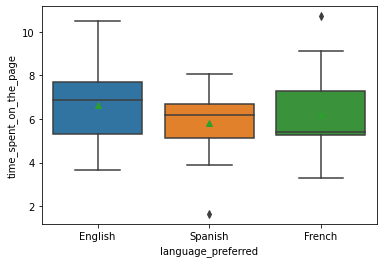

In [21]:
#new dataframe to filter out only the users in the treatment group
enews_treatment = enews[enews['group']=='treatment']

#boxplot to visualize distribution of time spent on landing page
sns.boxplot(data=enews_treatment, x='language_preferred', y='time_spent_on_the_page',showmeans=True)
plt.show()

Let $\mu_1$ be the mean time spent on the page for English speakers.
<br>
Let $\mu_2$ be the mean time spent on the page for Spanish speakers.
<br>
Let $\mu_3$ be the mean time spent on the page for French speakers.

$H_0:\mu_1 = \mu_2 = \mu_3$ 

$H_a:\mu_1 \neq \mu_2$ or $\mu_2 \neq \mu_3$ or $\mu_1 \neq \mu_3$

We will use a one-way ANOVA f-test to compare the means of time spent on the landing page for each preferred language.

In [22]:
#import function
from scipy.stats import f_oneway

#calculate p-value
test_stat, p_value = f_oneway(enews_treatment.loc[enews_treatment['language_preferred']=='English','time_spent_on_the_page'],
                              enews_treatment.loc[enews_treatment['language_preferred']=='Spanish','time_spent_on_the_page'],
                              enews_treatment.loc[enews_treatment['language_preferred']=='French','time_spent_on_the_page'])

#evalute p-value against alpha
pval_comp(p_value)

Since the p-value 0.43204138694325955 is greater than 0.05, we fail to reject the null hypothesis.


### Inference

With 95% confidence, there is enough evidence to suggest that the mean amount of time spent on the new landing page is the same for each language.

## Conclusion and Business Recommendations

#### Conclusions
- Users are spending more time on the new landing page than they are on the old landing page.
- The conversion rate for the new landing page is higher than the conversion rate for the old landing page.
- Conversion status is not dependent on the user's preferred language.
- Users are spending roughly the same amount of time on the new landing page regardless of their preferred language.

#### Recommendations
- I would suggest that the business roll out the new landing page.
    - The conversion rate is higher than the old page, and users are spending more time on the newer page than they are on the older page.
- Since the user's preferred language does not seem to have much of an impact on the amount of time a user spends on the landing page, it makes sense to keep the languages configured the way they currently are on the website.
    - If there was a bigger discrepancy between the languages, it might make sense to add or remove more content in that particular language; however, this is not the case.
    - E-news Express might want to look at adding support for additional languages in the future. This will help the company reacher an even larger audience of readers.